In [4]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr

#Creating red colormap
colors = plt.cm.Reds(np.linspace(0, 1, 256))
colors[0,:]=(1.0, 1.0, 1.0, 1.0)
Red = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

In [3]:
ds = xr.open_mfdataset('state1.nc')
tr = xr.open_mfdataset('tracer1.nc')
print(ds)
print(tr)

<xarray.Dataset>
Dimensions:  (T: 81, X: 2560, Xp1: 2561, Y: 1, Yp1: 2, Z: 480, Zl: 480)
Coordinates:
  * Xp1      (Xp1) float64 7.105e-15 28.12 56.24 ... 7.496e+04 7.499e+04
  * Y        (Y) float64 10.0
  * Z        (Z) float64 -1.649 -4.948 -8.247 ... -2.472e+03 -2.483e+03
  * X        (X) float64 14.06 42.18 70.3 ... 7.491e+04 7.494e+04 7.498e+04
  * Yp1      (Yp1) float64 0.0 20.0
  * Zl       (Zl) float64 0.0 -3.299 -6.597 ... -2.456e+03 -2.467e+03 -2.478e+03
  * T        (T) float64 0.0 2.16e+04 4.32e+04 ... 1.685e+06 1.706e+06 1.728e+06
Data variables:
    iter     (T) int32 dask.array<shape=(81,), chunksize=(81,)>
    U        (T, Z, Y, Xp1) float32 dask.array<shape=(81, 480, 1, 2561), chunksize=(81, 480, 1, 2561)>
    V        (T, Z, Yp1, X) float32 dask.array<shape=(81, 480, 2, 2560), chunksize=(81, 480, 2, 2560)>
    Temp     (T, Z, Y, X) float32 dask.array<shape=(81, 480, 1, 2560), chunksize=(81, 480, 1, 2560)>
    S        (T, Z, Y, X) float32 dask.array<shape=(81, 480, 1

In [5]:
xq=ds['X']
zl=ds['Zl']
tracer = np.squeeze(tr.tracer)
salt = np.squeeze(ds.S)
u = np.squeeze(ds.U)
v = np.squeeze(ds.V)
w = np.squeeze(ds.W)
i=10 #time index
traceri=np.array(tracer[i,:,:])
traceri[traceri==0]=np.nan;

salti=np.array(salt[i,:,:]); 
mask=salti; mask[mask>0]=np.nan; mask[mask==0]=1.0

salti=np.array(salt[i,:,:]); 
salti[salti==0]=np.nan
print(salti)

[[      nan 34.72144  34.714664 ... 34.455757 34.45566  34.454983]
 [      nan 34.711746 34.68889  ... 34.461544 34.461525 34.461464]
 [      nan 34.704357 34.683136 ... 34.467945 34.46794  34.467937]
 ...
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]
 [      nan       nan       nan ... 34.9139   34.9139   34.9139  ]]


80


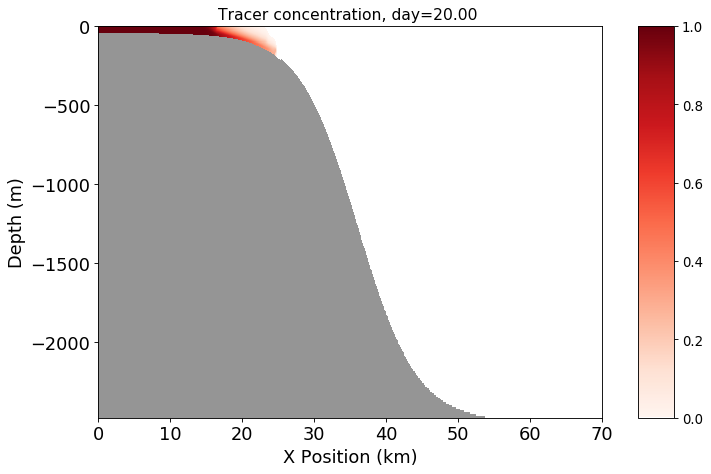

In [23]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad1 = quad0
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

for i in range(80,81):
    print(i)
    traceri=np.array(tracer[i,:,:])
    traceri[traceri==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,traceri,cmap=Red,vmin=0.0,vmax=1.0,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    ax1.set_title('Tracer concentration, day=%05.2f ' %(i/4), fontsize=14)
    #ax1.set_title('Tracer concentration, minute=%2.f ' %(i), fontsize=14)
    ax1.set_xlim(0,70)

80


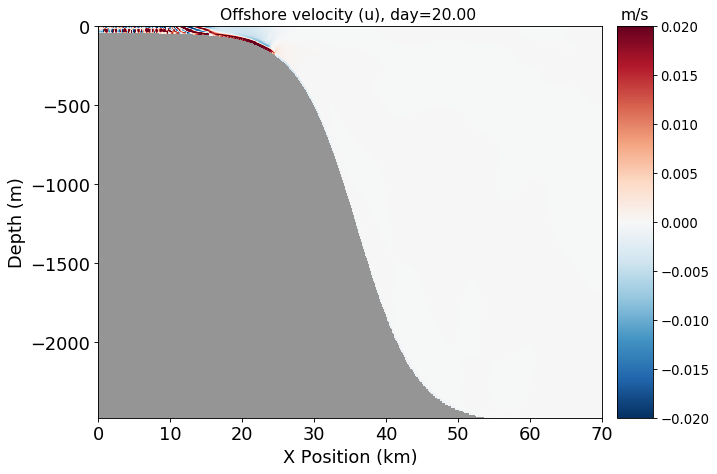

In [25]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

for i in range(80,81):
    print(i)
    ui=np.array(u[i,:,0:2560])
    ui[ui==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,ui,cmap='RdBu_r',vmin=-0.02,vmax=0.02,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    #ax1.set_title('Offshore velocity (u), minute=%2.f ' %(i), fontsize=14)
    ax1.set_title('Offshore velocity (u), day=%05.2f ' %(i/4), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    ax1.set_xlim(0,70)
    plt.savefig('index%.3d'%i)

/work2/eay/mitgcm_videos/gif2D


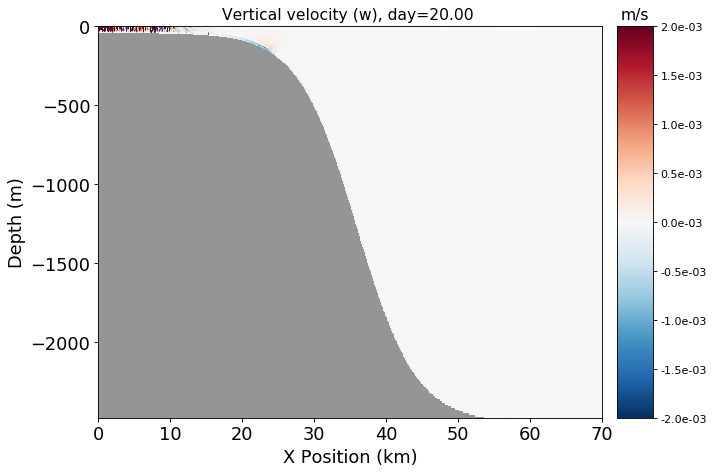

In [26]:

fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=10);

for i in range(80,81):
    wi=np.array(w[i,:,0:2560])
    wi[wi==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,wi*1000,cmap='RdBu_r',vmin=-2,vmax=2,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2,format='%.1fe-03')
    ax1.set_xlim(0,70)
    #ax1.set_title('Vertical velocity (w), minute=%2.f ' %(i), fontsize=14)
    ax1.set_title('Vertical velocity (w), day=%05.2f ' %(i/4), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    plt.savefig('index%.3d'%i)

In [27]:

from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

/work2/eay/mitgcm_videos/gif2D


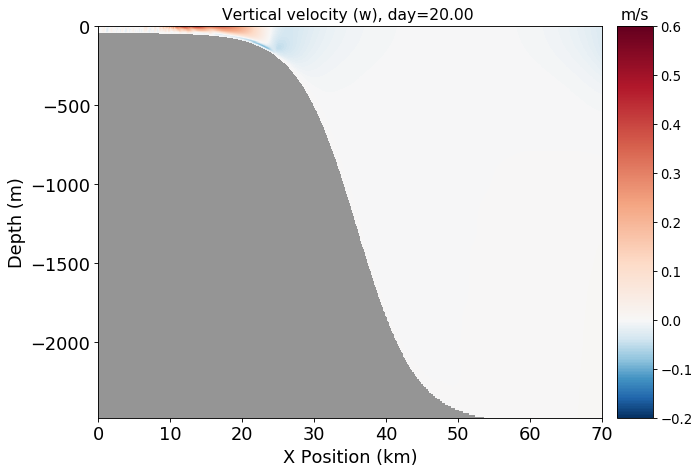

In [28]:

fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);
orig_cmap = matplotlib.cm.RdBu_r
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted')
for i in range(80,81):
    vi=np.array(v[i,:,0,0:2560])
    vi[vi==0]=np.nan;
    quad1 = ax1.pcolormesh(xq/1000,zl,vi,cmap='shifted',vmin=-0.2,vmax=.6,shading='goaround')
    cb1 = fig.colorbar(quad1,ax2)
    #ax1.set_title('Alongshore velocity (v), minute=%2.f ' %(i), fontsize=14)
    ax1.set_title('Vertical velocity (w), day=%05.2f ' %(i/4), fontsize=14)
    ax2.set_title('m/s', fontsize=14)
    ax1.set_xlim(0,70)
    plt.savefig('index%.3d'%i)